In [8]:
pip install patool

Note: you may need to restart the kernel to use updated packages.


In [50]:
#!python -m pip show Keras

In [7]:
#pip install images

SyntaxError: invalid syntax (Temp/ipykernel_15044/2887397661.py, line 2)

In [11]:
#import images and unzip
#import patoolib
#patoolib.extract_archive("TouchImages.zip")

patool: Extracting TouchImages.zip ...
patool: ... TouchImages.zip extracted to `TouchImages'.


'TouchImages'

In [34]:
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import datetime
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
import itertools
import os
import time


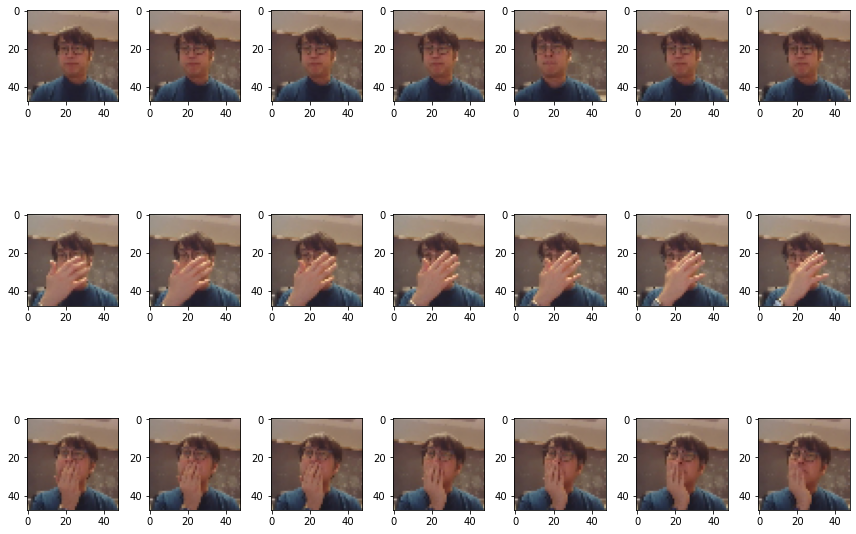

In [26]:
#Display sample images for each label

# Image Size LxW
pic_size = 48

PATH = "images2/"

#Show me your faceS
plt.figure(0, figsize=(12,20))
image_index = 0

for expression in os.listdir(PATH + "train/"):
    for i in range(1,8):
        image_index = image_index + 1
        plt.subplot(7,7,image_index)
        imgage_preview = load_img(PATH + "train/" + expression + "/" +os.listdir(PATH + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(imgage_preview) #cmap="gray")

plt.tight_layout()
plt.show()

In [28]:
#How many images are we talking about?!?
for label in os.listdir(PATH + "train"):
    print(str(len(os.listdir(PATH + "train/" + label))) + " " + label + " images")

180 NoHands images
183 NoTouch images
181 Touch images


In [39]:
#Batch Images
batch_size = 16

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(PATH + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(PATH + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 544 images belonging to 3 classes.
Found 94 images belonging to 3 classes.


In [45]:
#NN Setup and config
class_count = 3
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5),padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layer 1st layer
model.add(Flatten())
model.add(BatchNormalization()) 
model.add(Dense(256)) 
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2nd layer
model.add(Dense(512)) 
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(class_count, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\gaiag\anaconda3\envs\AIPlayground\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
#Execute Training
#%%time
epochs = 20

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/20


C:\Users\gaiag\AppData\Local\Temp/ipykernel_15044/2017408823.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


34/34 [==============================] - 10s 295ms/step - loss: 0.1786 - accuracy: 0.9449 - val_loss: 0.4231 - val_accuracy: 0.7625
Epoch 2/20
34/34 [==============================] - 9s 260ms/step - loss: 0.1329 - accuracy: 0.9577 - val_loss: 0.2214 - val_accuracy: 0.8875
Epoch 3/20
34/34 [==============================] - 9s 263ms/step - loss: 0.1142 - accuracy: 0.9632 - val_loss: 0.0545 - val_accuracy: 1.0000
Epoch 4/20
34/34 [==============================] - 9s 260ms/step - loss: 0.1113 - accuracy: 0.9632 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 5/20
34/34 [==============================] - 9s 258ms/step - loss: 0.0730 - accuracy: 0.9816 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 6/20
34/34 [==============================] - 10s 285ms/step - loss: 0.0757 - accuracy: 0.9743 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 7/20
34/34 [==============================] - 10s 297ms/step - loss: 0.0952 - accuracy: 0.9743 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 8/20
34/

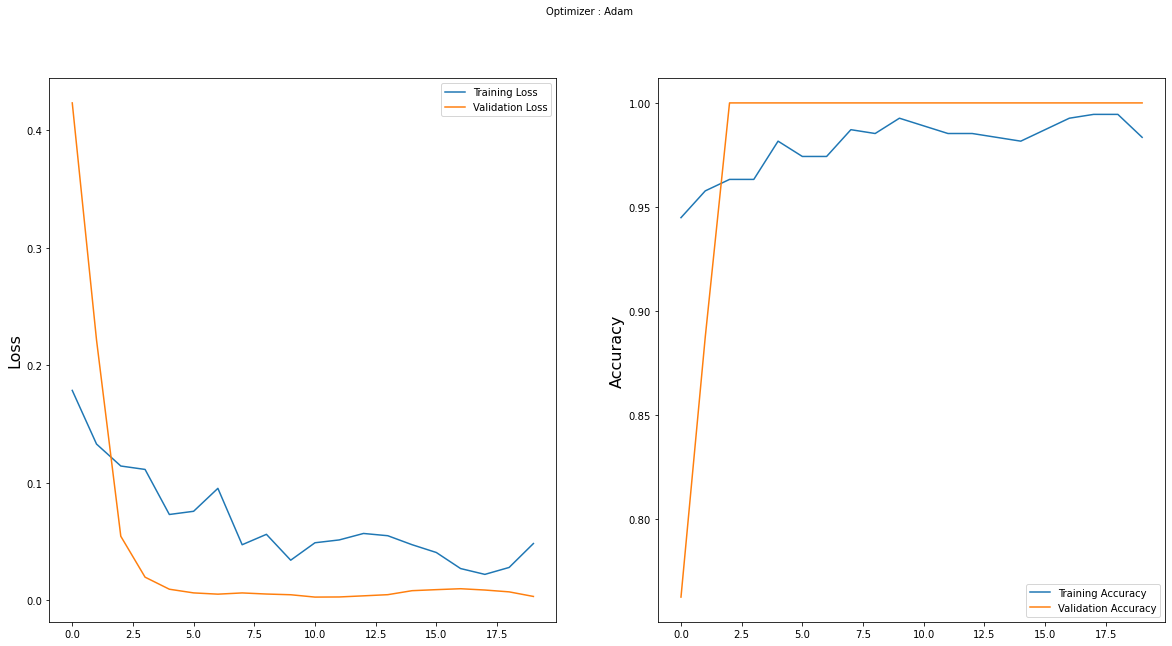

In [50]:
#Calculate the Loss and Accuracy

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

C:\Users\gaiag\AppData\Local\Temp/ipykernel_15044/4250176596.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=validation_generator)


<Figure size 432x288 with 0 Axes>

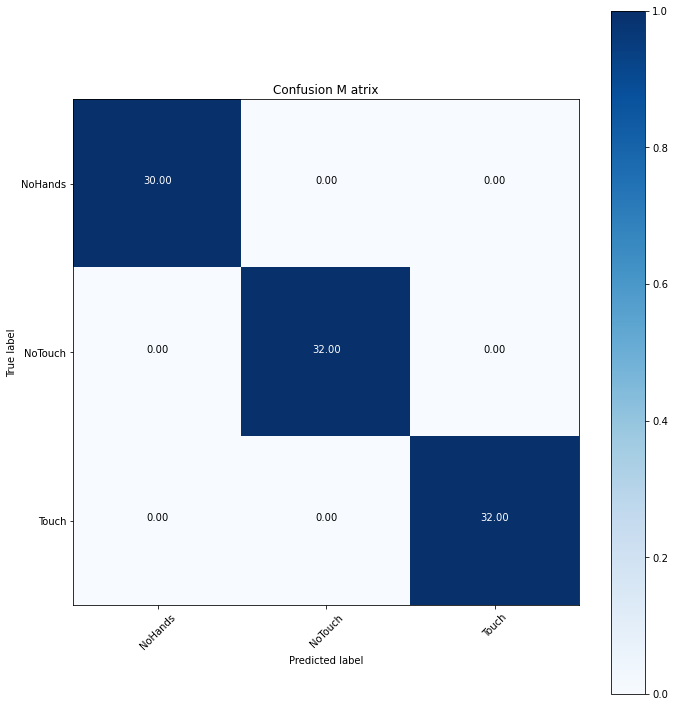

In [51]:
# show the confusion matrix

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_predictions = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    confusion_matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    display_format = '.2f'
    thresh = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(cm[i, j], display_format),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    print()
    
# calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predictions)
np.set_printoptions(precision=2)

# show confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion M atrix')
plt.show()